In [61]:
import torch
from model_class import CNN
from torchvision import transforms
import matplotlib.pyplot as plt
import cv2

In [62]:
model = torch.load('model.pkl')
model.eval()

CNN(
  (con1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (acv1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (con2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (acv2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (con3): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (acv3): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (con4): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (acv4): ReLU()
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (lin1): Linear(in_features=256, out_features=512, bias=True)
  (act5): ReLU()
  (lin2): Linear(in_features=512, out_features=37, bias=True)
)

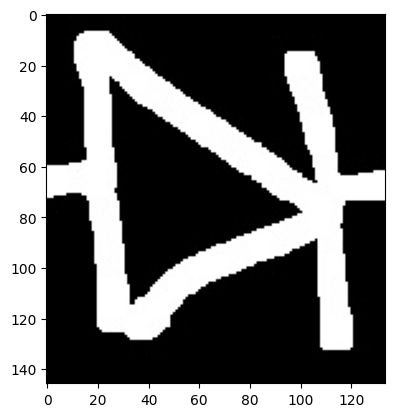

In [63]:
img = cv2.imread('test_images/classify1.jpeg')
plt.imshow(img, cmap='gray')

In [64]:
k = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_ERODE, k, iterations=2)


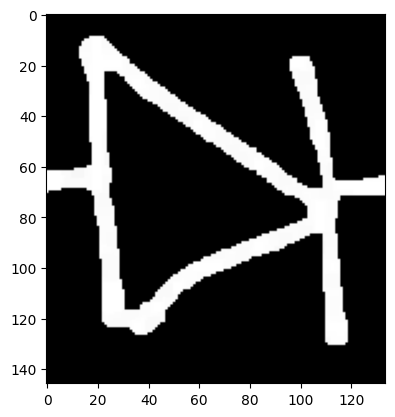

In [65]:
plt.imshow(img, cmap='gray')

In [66]:
mean = img.mean()
std = img.std()
mean, std

(44.17971784911061, 95.96118046058844)

In [67]:
tran = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64,64)),
    #transforms.Normalize(mean, std),
    transforms.Lambda(lambda x: x[0,:,:].T),
    ])

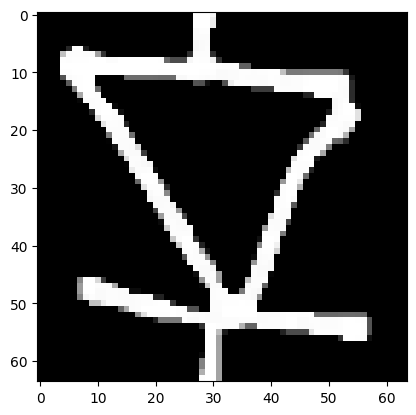

In [68]:
img = tran(img)
plt.imshow(img,cmap='gray')

In [69]:
label_list = ['ac_src_r0',
 'ac_src_r1',
 'battery_r0',
 'battery_r1',
 'battery_r2',
 'battery_r3',
 'cap_r0',
 'cap_r1',
 'curr_src_r0',
 'curr_src_r1',
 'curr_src_r2',
 'curr_src_r3',
 'dc_volt_src_1_r0',
 'dc_volt_src_1_r1',
 'dc_volt_src_1_r2',
 'dc_volt_src_1_r3',
 'dc_volt_src_2_r0',
 'dc_volt_src_2_r1',
 'dc_volt_src_2_r2',
 'dc_volt_src_2_r3',
 'dep_curr_src_r0',
 'dep_curr_src_r1',
 'dep_curr_src_r2',
 'dep_curr_src_r3',
 'dep_volt_r0',
 'dep_volt_r1',
 'dep_volt_r2',
 'dep_volt_r3',
 'diode_r0',
 'diode_r1',
 'diode_r2',
 'diode_r3',
 'gnd_1',
 'inductor_r0',
 'inductor_r1',
 'resistor_r0',
 'resistor_r1']

In [70]:
output = model(img.unsqueeze(0))

In [71]:
output.argmax().item()

28

In [72]:
label_list[output.argmax().item()]

'diode_r0'